In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import check_lab04 as p

plt.rcParams.update({'font.size': 14})
plt.rcParams['lines.linewidth'] = 3
pi=np.pi

ME 3264 - Applied Measurements Laboratory
=====================================

Lab #4 - Cross-Flow Heat Exchanger
=====================================

## Objective
The objectives of this laboratory are :

1. Understand and practice basic heat exchanger analysis methods.
2. Measure the hot and cold fluid temperatures and mass flow rates.
3. Calculate the experimental heat exchanger effectiveness and other performance metrics and compare to the predicted effectiveness obtained by the NTU method.
4. Learn how to apply this analysis to determine cross-flow heat exchanger performance.



 ## Background

The process of heat exchange between two fluids that are at different temperatures and separated by a solid wall occurs in many engineering applications. The device used to implement this exchange is termed a heat exchanger, and specific applications may be found in space heating and air-conditioning, power production, waste heat recovery, and chemical processing [1]

Heat exchangers are typically classified according to flow arrangement and type of construction. In this laboratory, you will
study a cross-flow heat exchanger such as that used in the radiator of a car [Fig (1)], in which the hot liquid is cooled down by the airflow on the surface of the radiator. In this configuration, heat transfer occurs between a flow of hot water and a flow of cool air circulating in an orthogonal direction with respect to each other, so that hot flow and cold flow cross each other (crossed-flow)[2].

![Car radiator drawing](./car_radiator.jpg)"
<center>Figure 1: Car cooling system and Radiator  </center>

#### Heat Exchanger Analysis: Use of the Log Mean Temperature Difference (LMTD)

To design or to predict the performance of a heat exchanger, it is essential to relate the total heat transfer rate ($q$) to quantities such as the inlet and outlet fluid temperatures, the overall heat transfer coefficient, and the total surface area for heat transfer. This is achieved by applying [Newton’s law of cooling](https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling) to the heat exchanger with the overall heat transfer coefficient $U$ and appropriate temperature difference that drives the heat transfer ($T_{lm}$), and represented by Eqn(1).

$\small q = UA\Delta T_{lm}$  (1)

where $T_{lm}$ is also known as Log Mean Temperature Difference (LMTD) and given by Eqn(2)

$ \Delta T_{lm} = \large \frac{\Delta T_2 - \Delta T_1}{ln (\frac{\Delta T_2}{\Delta T_1})} = \frac{\Delta T_1 - \Delta T_2}{ln (\frac{\Delta T_1}{\Delta T_2})}$ (2)

where $\Delta T_1$ and $\Delta T_2$ depend on the flow arrangement and inlet and outlet temperatures of the hot and cold fluid streams. Subscripts $h$ and $c$ stand for hot and cold fluid, $i$ and $o$ stand for inlet and outlet.


* For paraller flow heat exchanger:  $ \Delta T_1 = T_{h,i} -  T_{c,i} $, $ \Delta T_2 = T_{h,o} -  T_{c,o}$ (3)

* For counterflow heat exchanger ($\Delta T_{lm,CF}$):  $ \Delta T_1 = T_{h,i} -  T_{c,o} $, $ \Delta T_2 = T_{h,o} -  T_{c,i}$ (4)

* For cross-flow heat exchanger: $ T_{lm} = F \Delta T_{lm,CF}$ (5)

$F$ is the correction factor and $ \Delta T_{lm, CF}$ is the LMTD that would be computed under the assumption of counter-flow conditions. The correction factor depends on the geometry of the heat exchanger and the inlet and outlet temperatures of the hot and cold fluid stream. Algebraic expressions for the correction factor $F$ have been developed for various shell-and-tube and cross-flow heat exchanger configurations, and the results may be represented graphically. Selected results are shown in Chapter 11S.1 of [1], [3] for common cross-flow heat exchanger configurations. 

The overall thermal resistance of the heat exchanger, $R$, is proportional to $\Delta T_{lm}$defined as:

$R = \large \frac{1}{UA} = \frac {\Delta T_{lm}}{q_c}$


#### Heat Exchanger Analysis: The Effectiveness– _Number of Transfer Units_ (NTU) Method

It is a simple matter to use the log mean temperature difference (LMTD) method of heat exchanger analysis when the fluid inlet temperatures are known and the outlet temperatures are specified or readily determined from the energy balance expressions Eqn(6) and Eqn(7):

$ q = q_h = \dot{m}_h c_{p,h}(T_{h,i} -  T_{h,o} )$ (6)

OR

$ q = q_c = \dot{m}_c c_{p,c}(T_{c,o} -  T_{c,i} )$ (7)

The value of $T_{lm}$ for the exchanger may then be determined from Eqn(1). Note that, here we are assuming that there is no heat loss to the ambient. Hence, $q = q_h =q_c$. You have to assess the validity of this assumption in the experiment when using these equations.

However, if only the inlet temperatures are known, the use of the LMTD method requires a cumbersome iterative procedure. It is, therefore, preferable to employ an alternative approach termed the number of transfer units (NTU) or effectiveness method. The effectiveness, $\epsilon$, is the ratio of the actual heat transfer rate for a heat exchanger to the maximum possible heat transfer rate 

$\large \epsilon = \frac{q}{q_{max}}$ (8)

where, 

$q_{max} = C_{min}(T_{h,i} -  T_{c,i} )$  (9)

$C_{min} =  (\dot{m} c_{p})_{min}$  (10)

and NTU refers to is the number of transfer units defined as:

$ NTU = \large \frac{UA}{C_{min} } = \frac{1}{R C_{min} }$  (10)

For any heat exchanger it can be shown that $\epsilon = f (NTU, \frac{C_{min}}{C_{max}})$. Equations have been developed for the calculation of the effectiveness of various types of heat exchangers [1,2]. 



#### Problem 1

Consider the heat exchanger design of a finned-tube, cross-flow heat exchanger with a gas-side overall heat transfer coefficient and area of 100 W/m2.K and 40 m2, respectively. The water flow rate and inlet temperature remain at 1 kg/s and
35deg C. However, a change in operating conditions for the hot gas generator causes the gases to now enter the heat exchanger with a flow rate of 1.5 kg/s and a temperature of 250 deg C. What is the effectiveness of this heat exchanger?  Assume specific heat of gas = 1000 J/kg.K, and water = 4197 J/kg.K

In [4]:
# Define variables
# Hot stream
Thi = 250  # deg C
mfh = 1.5  # kg/s
cph = 1000 # J/kg.K
# Cold stream
Tci = 35
mfc = 1  # kg/s
cpc = 4197 #J/kg.K.

# Heat exchanger
U = 100 # W/m2.K
A = 40 # m2
Cmin = np.amin([mfh*cph, mfc*cpc])
Cmax = np.amax([mfh*cph, mfc*cpc])

NTU = U*A/Cmin  # Eqn 10

# Function to calculate effectiveness using effectivenesss-NTU method
def epsilon_crossflow (Cmin, Cmax, NTU):
    Cr = Cmin/Cmax
    exp1 = np.exp(-Cr*NTU**0.78)-1
    exp2 = np.exp(1/Cr*NTU**0.22*exp1)
    epsilon = 1-exp2
    return epsilon 


eps = epsilon_crossflow(Cmin, Cmax, NTU)
print("Effectiveness of heat exchanger = %1.2f" %eps)

Effectiveness of heat exchanger = 0.84


### Check Your Work

#### Problem 2

In the above example,

a. What is the rate of heat transfer,$q$, by the exchanger?

b. what are the gas ($T_{h,o}$) and water outlet temperatures ($T_{c,o}$)? 

In [10]:
## # enter your work here - Uncomment the following lines of code and make necessary changes

# def qmax (Cmin, Thi,Tci):
#     qmax = 
#     return qmax 

# qmax = qmax (Cmin, Thi,Tci)

# q =   # Hint :use Eqn 8

# Hint :use Eqn 6 and 7
# Tho = 
# Tco = 

print("Total heat transfer from hot to cold fluid = %1.3f kW" %(q/1000))
#p.check_p02a(q/1000)

print("Gas outlet temprature = %1.3f" %Tho)
print("Water outlet temprature = %1.3f" %Tco)

#p.check_p02b(Tho, Tco)

Total heat transfer from hot to cold fluid = 0.845 kW


NameError: name 'Tho' is not defined

#### Problem 3

For the test 1 of the experiment, hot water enters the cross flow heat exchanger at 1.5 litres/min and 330K, and leaves at 317K.The water is cooled by air generated by a fan and entering the heat exchanger at 297K in cross-stream direction. Fan is operating at maximum speed of 600 m3/h What is the experimental value effectiveness for this heat exchanger? 

Assume specific heat of air = 1000 J/kg.K, and water = 4197 J/kg.K
Density of water = 1000 kg/m3, Density of air = 1.2 kg/m3

In [ ]:
## # enter your work here - Uncomment the following lines of code and make necessary changes

# # Define variables
# # Hot stream
# Thi = 330# K
# Tho = 317
# rhoh = 1000 #kg/m3
# vfh = 1.5 #LPM
# mfh = vfh/1000/60*rhoh #kg/s
# cph = 4197 #J/kg.K

# # Cold stream
# Tci = 297
# vfc = 600/3600 # m3/s
# rhoc= 1.2
# mfc = vfc*rhoc
# cpc = 1000 

# Cmin = np.amin([mfh*cph, mfc*cpc])

# def qmax (Cmin, Thi,Tci):
#     qmax = Cmin*(Thi-Tci)
#     return qmax 

# qmax = qmax (Cmin, Thi,Tci)

# q = np.abs(mfh*cph*(Tho-Thi))
# eps = q/qmax

print("Effectiveness of heat exchanger = %1.2f" %eps)

p.check_p03(eps)

## Procedure 

The procedure and details of the experiment are included in a lab-handout [2].

[ME3264_Lab_4_Cross-flow_Heat_Exchanger.pdf](https://drive.google.com/file/d/1Wdr-sx0VDOWYGsOaiwb5VQlbp-VZfcid/view?usp=sharing)

The lab procedure is demonstrated here

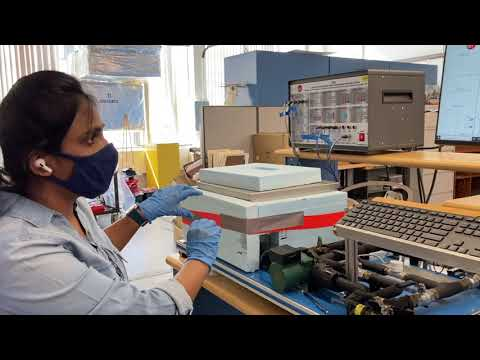

In [8]:
from IPython.display import YouTubeVideo
vid = YouTubeVideo("iEBjXRVPecY")
display(vid)

## Notes on error propagation and uncertainties

For this lab, you are required to perform error propagation for experimental value of effectiveness.  

The theory of error analysis gives a general formula for the uncertainty when a result is found by a calculation from a collection of measurements [4],. The formula is based on the idea of a first-order Taylor series expansion of functions of many variables. For a well behaved function $f(x,y,z,...)$ of the completely independent physical variables $x,y,z,...$ which have uncertainties $,\sigma_x,\sigma_y,\sigma_z,...$ then the uncertainty in the value of the result $\sigma_f$ is given by the formula:

$\sigma_f^2 = (\frac{\partial{f}}{\partial x})^2\sigma_x^2 + (\frac{\partial{f}}{\partial y})^2\sigma_y^2 + (\frac{\partial{f}}{\partial z})^2\sigma_z^2$   

For more details on error propagation refer to [ME 3264- Lab 1 - Heat Engine Notebook ](https://cooperrc.github.io/applied_measurements/lab_01/ME3264_Lab-01.html#lab-1-heat-engine)

## References 
1. T.L. Bergman, A.S. Lavine, F.P. Incropera, D.P. Dewitt, Fundamentals of Heat and Mass Transfer, 7th ed., Wiley, Hoboken (2011), Chapter 11
2. [ME3264_Lab_4_Cross-flow_Heat_Exchanger.pdf](https://drive.google.com/file/d/1Wdr-sx0VDOWYGsOaiwb5VQlbp-VZfcid/view?usp=sharing)
3. [Supplemental Sections Chapter 11S.1](https://drive.google.com/file/d/1wuDUqetR2zE9jw9eXE4HbXFYLHSpJFVm/view?usp=sharing)
4.  [ME 3264- Lab 1 - Heat Engine Notebook ](https://cooperrc.github.io/applied_measurements/lab_01/ME3264_Lab-01.html#lab-1-heat-engine)
